### Import necessary packages

In [1]:
import nltk
nltk.download('punkt') # for sent_tokenize
nltk.download('stopwords') 
nltk.download('wordnet') # for WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anitateladevalapalli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anitateladevalapalli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anitateladevalapalli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Setting random seed
seed = 123
# Data manipulation/analysis
import numpy as np
import pandas as pd
# Data partitioning
from sklearn.model_selection import train_test_split
# Text preprocessing/analysis
import re
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context='talk', 
        palette=['#D44D5C', '#43AA8B'])

### Downloaded the weather sentiment data from the Github link provided
https://data.world/crowdflower/weather-sentiment

In [3]:
sample= pd.read_csv('/Users/anitateladevalapalli/Downloads/weather.csv')
sample.head()

,_unit_id,_canary,_unit_state,_trusted_judgments,_last_judgment_at,what_emotion_does_the_author_express_specifically_about_the_weather,what_emotion_does_the_author_express_specifically_about_the_weather:confidence,gold_answer,tweet_id,tweet_text
0,314960380,NaN,finalized,20,8/24/13 0:21,Positive,0.8439,NaN,81990560,Grilling kabobs on the grill last night was am...
1,314960381,NaN,finalized,20,8/24/13 0:49,Negative,0.6963,NaN,84314377,The slowest day ever !! And the weather makes ...
2,314960382,NaN,finalized,20,8/24/13 0:55,Neutral / author is just sharing information,0.8802,NaN,82846118,Fire Weather Watch issued May 17 at 4:21PM CDT...
3,314960383,NaN,finalized,20,8/24/13 0:48,Positive,0.6897,NaN,82843785,Im going to lunch early today. The weather i...
4,314960384,NaN,finalized,20,8/24/13 1:19,Neutral / author is just sharing information,0.6153,NaN,82840144,Weekend Weather Causes Delays In I-270 Bridge ...


In [4]:
sample['emotion']=sample['what_emotion_does_the_author_express_specifically_about_the_weather']

In [5]:
sample.drop(['what_emotion_does_the_author_express_specifically_about_the_weather'],axis=1)

,_unit_id,_canary,_unit_state,_trusted_judgments,_last_judgment_at,what_emotion_does_the_author_express_specifically_about_the_weather:confidence,gold_answer,tweet_id,tweet_text,emotion
0,314960380,NaN,finalized,20,8/24/13 0:21,0.8439,NaN,81990560,Grilling kabobs on the grill last night was am...,Positive
1,314960381,NaN,finalized,20,8/24/13 0:49,0.6963,NaN,84314377,The slowest day ever !! And the weather makes ...,Negative
2,314960382,NaN,finalized,20,8/24/13 0:55,0.8802,NaN,82846118,Fire Weather Watch issued May 17 at 4:21PM CDT...,Neutral / author is just sharing information
3,314960383,NaN,finalized,20,8/24/13 0:48,0.6897,NaN,82843785,Im going to lunch early today. The weather i...,Positive
4,314960384,NaN,finalized,20,8/24/13 1:19,0.6153,NaN,82840144,Weekend Weather Causes Delays In I-270 Bridge ...,Neutral / author is just sharing information
...,...,...,...,...,...,...,...,...,...,...
995,314961375,NaN,finalized,20,8/24/13 0:50,0.8747,NaN,82676486,"good morning, it's sunny, pick up new car and ...",Positive
996,314961376,NaN,finalized,20,8/24/13 0:36,0.7509,NaN,84311591,Just saw Snow White working at Lady Foot Locke...,Tweet not related to weather condition
997,314961377,NaN,finalized,20,8/24/13 0:16,0.5128,NaN,84312565,RT @mention: Do NOT go out to move your car in...,Negative
998,314961378,NaN,finalized,20,8/24/13 0:38,0.7472,NaN,84033089,Not outside but looking out the window at them...,Negative


In [6]:
sample['emotion'].value_counts()

Negative                                        271
Neutral / author is just sharing information    261
Tweet not related to weather condition          235
Positive                                        231
I can't tell                                      2
Name: emotion, dtype: int64

In [7]:
values = ["Neutral / author is just sharing information","Tweet not related to weather condition","I can't tell"]
sample = sample[sample.emotion.isin(values) == False]
sample.head()

,_unit_id,_canary,_unit_state,_trusted_judgments,_last_judgment_at,what_emotion_does_the_author_express_specifically_about_the_weather,what_emotion_does_the_author_express_specifically_about_the_weather:confidence,gold_answer,tweet_id,tweet_text,emotion
0,314960380,NaN,finalized,20,8/24/13 0:21,Positive,0.8439,NaN,81990560,Grilling kabobs on the grill last night was am...,Positive
1,314960381,NaN,finalized,20,8/24/13 0:49,Negative,0.6963,NaN,84314377,The slowest day ever !! And the weather makes ...,Negative
3,314960383,NaN,finalized,20,8/24/13 0:48,Positive,0.6897,NaN,82843785,Im going to lunch early today. The weather i...,Positive
5,314960385,NaN,finalized,20,8/24/13 0:27,Positive,0.6365,NaN,82510997,Passing out now. working tonight. Storms toda...,Positive
7,314960387,NaN,finalized,20,8/24/13 0:40,Negative,0.4132,NaN,81211801,@mention s friday at 6 at tha stadium ...if th...,Negative


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
sample['em']= le.fit_transform(sample['emotion'])
percentages=sample.em.value_counts()*100/len(sample)
percentages[2]=100-(percentages[0]+percentages[1])

### plotting the percentage of negative and positive tweets

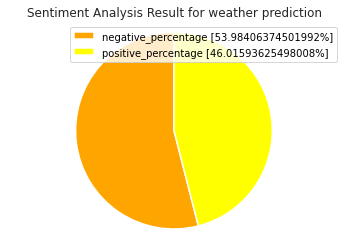

In [10]:
labels = ['negative_percentage ['+str(percentages[0])+'%]','positive_percentage ['+str(percentages[1])+'%]']
colors = ['orange', 'yellow','yellowgreen']
sizes= [percentages[0],percentages[1]]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for weather prediction")
plt.axis('equal')
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(sample['tweet_text'], sample['emotion'], test_size=0.2, random_state=seed, 
                                                    stratify=sample['emotion'])
# Append sentiment back using indices
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [12]:
print(f"Train: {train.shape[0]} rows and {train.shape[1]} columns")
print(f"{train['emotion'].value_counts()}\n")
print(f"Test: {test.shape[0]} rows and {test.shape[1]} columns")
print(test['emotion'].value_counts())

Train: 401 rows and 2 columns
Negative    216
Positive    185
Name: emotion, dtype: int64

Test: 101 rows and 2 columns
Negative    55
Positive    46
Name: emotion, dtype: int64


In [13]:
train.head()

,tweet_text,emotion
432,cold in here cold outside,Negative
390,What a tease yesterday's nice weather was. .,Positive
928,@mention and a #happymonday 2 u too sweets. Im...,Negative
156,"Just a heads up to everyone, weather is crazy ...",Negative
295,@mention loving this awesome Iowa weather!! s...,Positive


In [14]:
train_string = " ".join(X_train.values)
print(f"***** Extract of train_string ***** \n{train_string[:101]}", "\n")
# Split train_corpus by white space
splits = train_string.split()  
print(f"***** Extract of splits ***** \n{splits[:18]}\n")

***** Extract of train_string ***** 
cold in here cold outside What a tease yesterday's nice weather was. . @mention and a #happymonday 2  

***** Extract of splits ***** 
['cold', 'in', 'here', 'cold', 'outside', 'What', 'a', 'tease', "yesterday's", 'nice', 'weather', 'was.', '.', '@mention', 'and', 'a', '#happymonday', '2']



In [15]:
print(f"Number of strings: {len(splits)}")
print(f"Number of unique strings: {len(set(splits))}")

Number of strings: 5708
Number of unique strings: 2255


### 10 most common strings

In [16]:
freq_splits = FreqDist(splits)
print(f"***** 10 most common strings ***** \n{freq_splits.most_common(10)}", "\n")

***** 10 most common strings ***** 
[('the', 191), ('weather', 128), ('to', 113), ('I', 112), ('@mention', 109), ('in', 97), ('a', 90), ('is', 86), ('and', 83), ('this', 59)] 



In [17]:
short = set(s for s in splits if len(s)<4)
short = [(s, freq_splits[s]) for s in short]
short.sort(key=lambda x:x[1], reverse=True)
short

[('the', 191),
 ('to', 113),
 ('I', 112),
 ('in', 97),
 ('a', 90),
 ('is', 86),
 ('and', 83),
 ('for', 53),
 ('on', 46),
 ('be', 43),
 ('out', 42),
 ('RT', 41),
 ('of', 39),
 ('my', 39),
 ('it', 38),
 ('hot', 34),
 ('so', 33),
 ('at', 32),
 ('The', 28),
 ('you', 24),
 ('me', 24),
 ('was', 23),
 ('all', 21),
 ('its', 21),
 ('day', 18),
 ('not', 18),
 ('but', 17),
 ('are', 15),
 (':)', 15),
 ('go', 15),
 ('Its', 13),
 ('&', 13),
 ('as', 13),
 ('has', 13),
 ('up', 12),
 ('too', 12),
 ("I'm", 11),
 ('-', 11),
 ('2', 10),
 ('we', 9),
 ('It', 8),
 ('get', 8),
 ('lol', 8),
 ('am', 8),
 ('can', 7),
 ('got', 7),
 ('...', 7),
 ('In', 7),
 ('or', 7),
 ('no', 7),
 ('80', 7),
 ('an', 7),
 ('bad', 7),
 ('by', 7),
 ('way', 6),
 ('So', 6),
 ('!', 6),
 ('u', 6),
 (':(', 6),
 ('now', 5),
 ('A', 5),
 ('n', 5),
 ('For', 5),
 ('how', 5),
 ('(@', 5),
 ('say', 5),
 ('new', 5),
 ('My', 5),
 ('.', 5),
 ('up!', 5),
 ('off', 5),
 ('We', 5),
 ('do', 5),
 ('May', 4),
 ('see', 4),
 ('If', 4),
 ('You', 4),
 ('Day', 

In [18]:
long = set(s for s in splits if len(s)>15)
long = [(s, freq_splits[s]) for s in long]
long.sort(key=lambda x:x[1], reverse=True)
long

[('mirrors/monitor/television,', 1),
 ('#fuckyeahsummer!!', 1),
 ('Cuddling...alone', 1),
 ('Thunderstorm....wait,', 1),
 ('morning.....bring', 1),
 ('weather&beautiful', 1),
 ('#weathermanhasagreenthumb', 1),
 ('#yeahiamthattype', 1),
 ('#Ithoughtitwassummer', 1),
 ('Foothills/Shendoah', 1),
 ('#popularnameregardlessofparticipation', 1)]

### Summarise strings matching a pattern.

In [19]:
def summarise(pattern, strings, freq):
    
    # Find matches
    compiled_pattern = re.compile(pattern)
    matches = [s for s in strings if compiled_pattern.search(s)]
    
    # Print volume and proportion of matches
    print("{} strings, that is {:.2%} of total".format(len(matches), len(matches)/ len(strings)))
    
    # Create list of tuples containing matches and their frequency
    output = [(s, freq[s]) for s in set(matches)]
    output.sort(key=lambda x:x[1], reverse=True)
    
    return output
# Find strings possibly containing html tag
summarise(r"/?>?w*<|/>", splits, freq_splits)

0 strings, that is 0.00% of total


[]

In [20]:
summarise(r"\d", splits, freq_splits)

87 strings, that is 1.52% of total


[('2', 10),
 ('80', 7),
 ('6', 4),
 ('3', 3),
 ('60', 3),
 ('4', 3),
 ('90', 2),
 ('70', 2),
 ('90s', 2),
 ('81', 2),
 ('240', 1),
 (':0)', 1),
 ('$18', 1),
 ('6.69', 1),
 ('75', 1),
 ('1065', 1),
 ('91', 1),
 ('hell+2', 1),
 ('6:30!', 1),
 ('56', 1),
 ('31', 1),
 ('65', 1),
 ('5', 1),
 ('4-7.', 1),
 ('#11in11', 1),
 ('&lt;3', 1),
 ('82', 1),
 ('(#16).', 1),
 ('EF4', 1),
 ('8:30', 1),
 ('0', 1),
 ('9', 1),
 ('l8r', 1),
 ('35', 1),
 ('2day', 1),
 ('every1', 1),
 ('1', 1),
 ('2012', 1),
 ('7-Eleven)', 1),
 ('60s', 1),
 ('81%', 1),
 ('8', 1),
 ('oh...8', 1),
 ('-5', 1),
 ('#summer2011', 1),
 ('7lb', 1),
 ('10', 1),
 ('61', 1),
 ('100', 1),
 ('3rd', 1),
 ('62', 1),
 ('78', 1),
 ('66', 1),
 ('70.', 1),
 ('5:15', 1),
 ('8am!', 1),
 ('50', 1),
 ('K9.', 1),
 ('Mexico..85', 1)]

In [21]:
summarise(r"\w+-+\w+", splits, freq_splits)

15 strings, that is 0.26% of total


[('Forks-ish', 1),
 ('Sox-Rangers', 1),
 ('Chi-town.', 1),
 ('4-7.', 1),
 ('DePaul-Indiana', 1),
 ('tweet-ability', 1),
 ('7-Eleven)', 1),
 ('great-except', 1),
 ('flu-ish', 1),
 ('Storm-Downed', 1),
 ('bi-polar', 1),
 ('High-Atis', 1),
 ('b-roll', 1),
 ('Bi-polar!', 1),
 ('semi-perf', 1)]

In [22]:
summarise(r"\w+[_!&/)(<\|}{\[\]]\w+", splits, freq_splits)

11 strings, that is 0.19% of total


[('SHEESH&lt;&lt;', 1),
 ('mirrors/monitor/television,', 1),
 ('weather&beautiful', 1),
 ('w/hubby', 1),
 ('o_O', 1),
 ('a/c', 1),
 ('pic&gt;', 1),
 ('Foothills/Shendoah', 1),
 ('w/o', 1),
 ('s/o', 1),
 ("too!i'm", 1)]

### Find words that contain a same character 3+ times in a row.

In [23]:
def find_outlaw(word):
    
    is_outlaw = False
    for i, letter in enumerate(word):
        if i > 1:
            if word[i] == word[i-1] == word[i-2] and word[i].isalpha():
                is_outlaw = True
                break
    return is_outlaw
outlaws = [s for s in splits if find_outlaw(s)]
print("{} strings, that is {:.2%} of total".format(len(outlaws), len(outlaws)/ len(splits)))
outlaw_freq = [(s, freq_splits[s]) for s in set(outlaws)]
outlaw_freq.sort(key=lambda x:x[1], reverse=True)
outlaw_freq

21 strings, that is 0.37% of total


[('sooooo', 2),
 ('sooo', 2),
 ('Uqhhh', 1),
 ('awwww', 1),
 ('DOOOOOM.', 1),
 ('Stooooopppp.', 1),
 ('Mmmmmm', 1),
 ('Andddd', 1),
 ('Helloooo,', 1),
 ('Ughhhhhh', 1),
 ('Mmmm', 1),
 ('Insaneeee', 1),
 ('efferrr', 1),
 ('shhhh,', 1),
 ('Ahhh', 1),
 ('biiiiiiiiiitch!', 1),
 ('wowww', 1),
 ('freezzzinnggg!', 1),
 ('ittt', 1)]

In [24]:
tokeniser = RegexpTokenizer("[A-Za-z]+")
tokens = tokeniser.tokenize(train_string)
print(tokens[:20], "\n")

['cold', 'in', 'here', 'cold', 'outside', 'What', 'a', 'tease', 'yesterday', 's', 'nice', 'weather', 'was', 'mention', 'and', 'a', 'happymonday', 'u', 'too', 'sweets'] 



In [25]:
print(f"Number of tokens: {len(tokens)}")
print(f"Number of unique tokens: {len(set(tokens))}")

Number of tokens: 5764
Number of unique tokens: 1801


In [26]:
lemmatiser = WordNetLemmatizer()
tokens_norm = [lemmatiser.lemmatize(t.lower(), "v") for t in tokens]
print(f"Number of unique tokens: {len(set(tokens_norm))}")

Number of unique tokens: 1390


Average number of characters per token: 4.2615


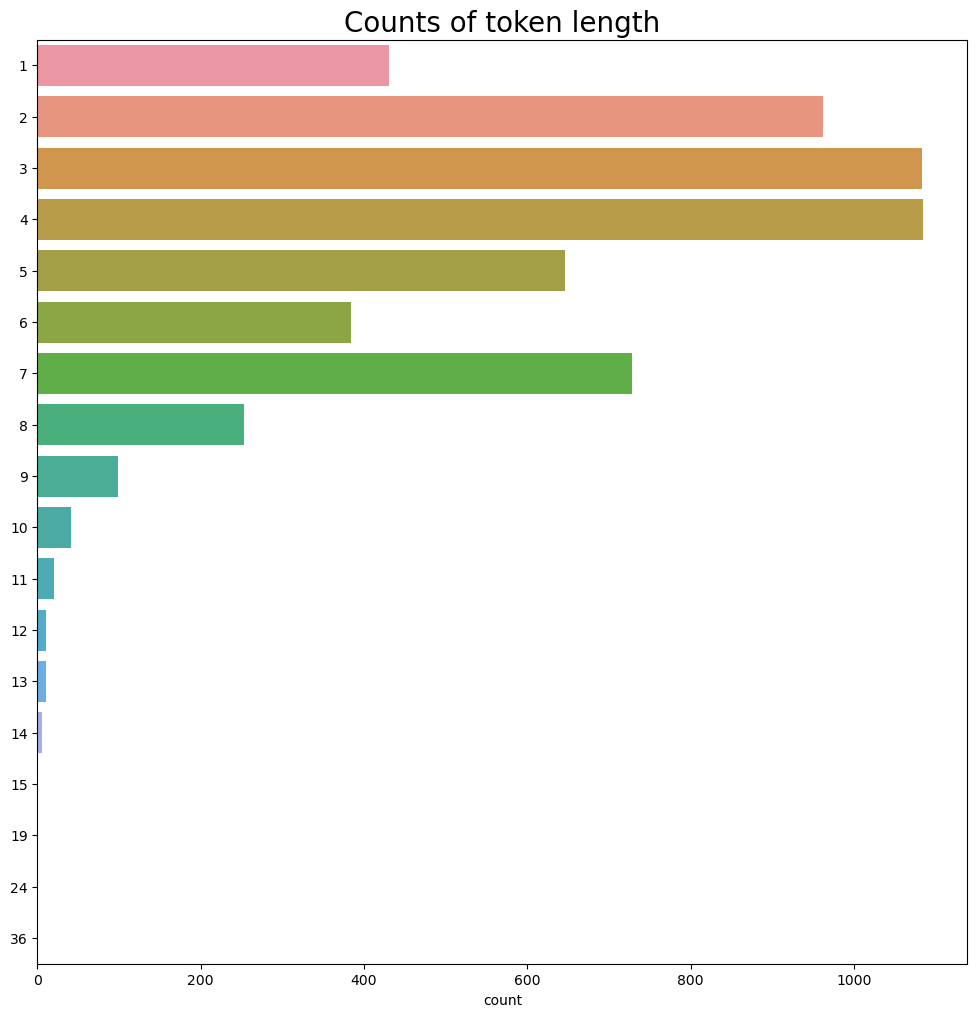

In [27]:
token_length = [len(t) for t in tokens]
# Average number of characters per token
print(f"Average number of characters per token: {round(np.mean(token_length),4)}")
# Plot distribution
plt.figure(figsize=(12, 12))
sns.countplot(y=token_length)
plt.title("Counts of token length", size=20);

In [28]:
pd.DataFrame(data=token_length, columns=['length']).query("length>10").value_counts()

length
11        20
13        11
12        10
14         6
15         1
19         1
24         1
36         1
dtype: int64

In [29]:
[t for t in tokens if len(t)>=20]

['weathermanhasagreenthumb', 'popularnameregardlessofparticipation']

In [30]:
stop_words = stopwords.words("english")
print(f"There are {len(stop_words)} stopwords.\n")
print(stop_words)

There are 179 stopwords.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own

In [31]:
stop_words.extend(["cannot", "could", "done", "let", "may" "mayn",  "might", "must", "need", "ought", "oughtn", "shall", "would", "br"])
print(f"There are {len(stop_words)} stopwords.\n")

There are 192 stopwords.



In [32]:
freq_stopwords = [(sw, tokens_norm.count(sw)) for sw in stop_words]
freq_stopwords.sort(key=lambda x: x[1], reverse=True)
freq_stopwords[:10]

[('the', 224),
 ('be', 211),
 ('i', 143),
 ('to', 114),
 ('in', 111),
 ('a', 100),
 ('it', 98),
 ('and', 88),
 ('s', 87),
 ('this', 76)]

In [33]:
n_stopwords = len([t for t in tokens_norm if t in stop_words])
print(f"{n_stopwords} tokens are stop words.")
print(f"That is {round(100*n_stopwords/len(tokens_norm),2)}%.")


2425 tokens are stop words.
That is 42.07%.


In [34]:
tokens_clean = [t for t in tokens_norm if t not in stop_words]
print(f"Number of tokens: {len(tokens_clean)}")

Number of tokens: 3339


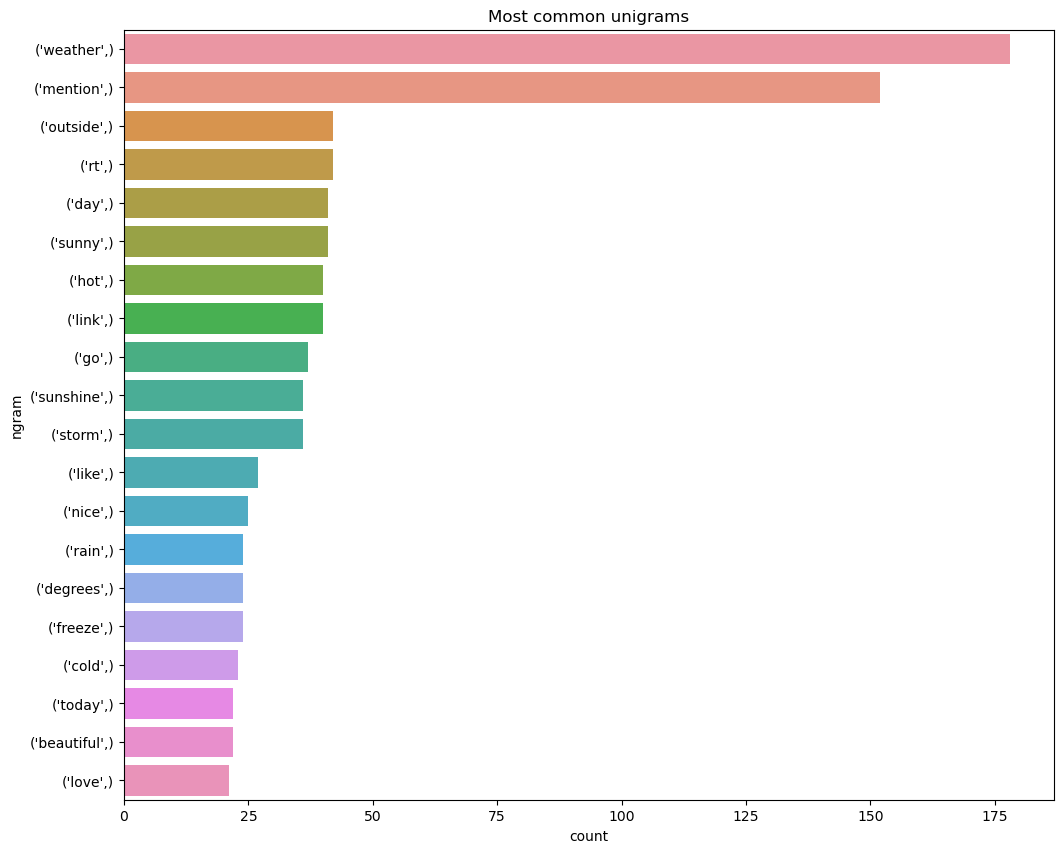

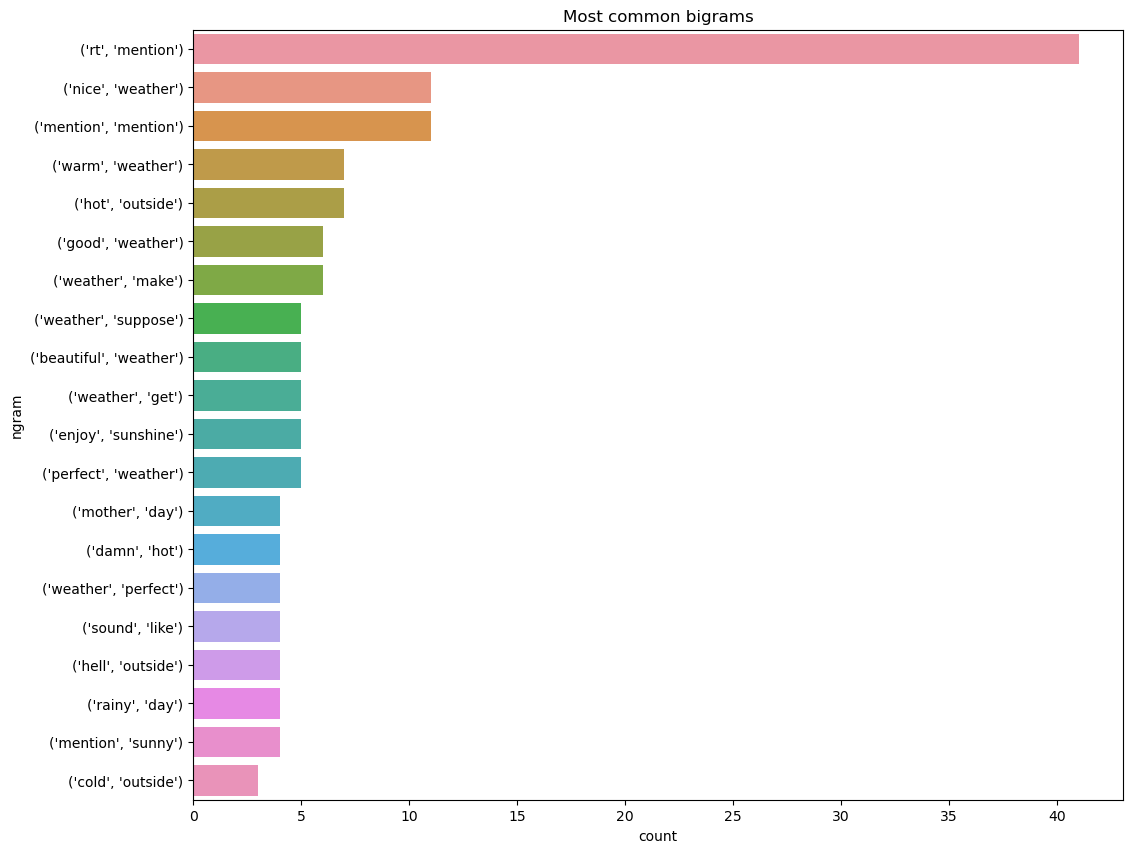

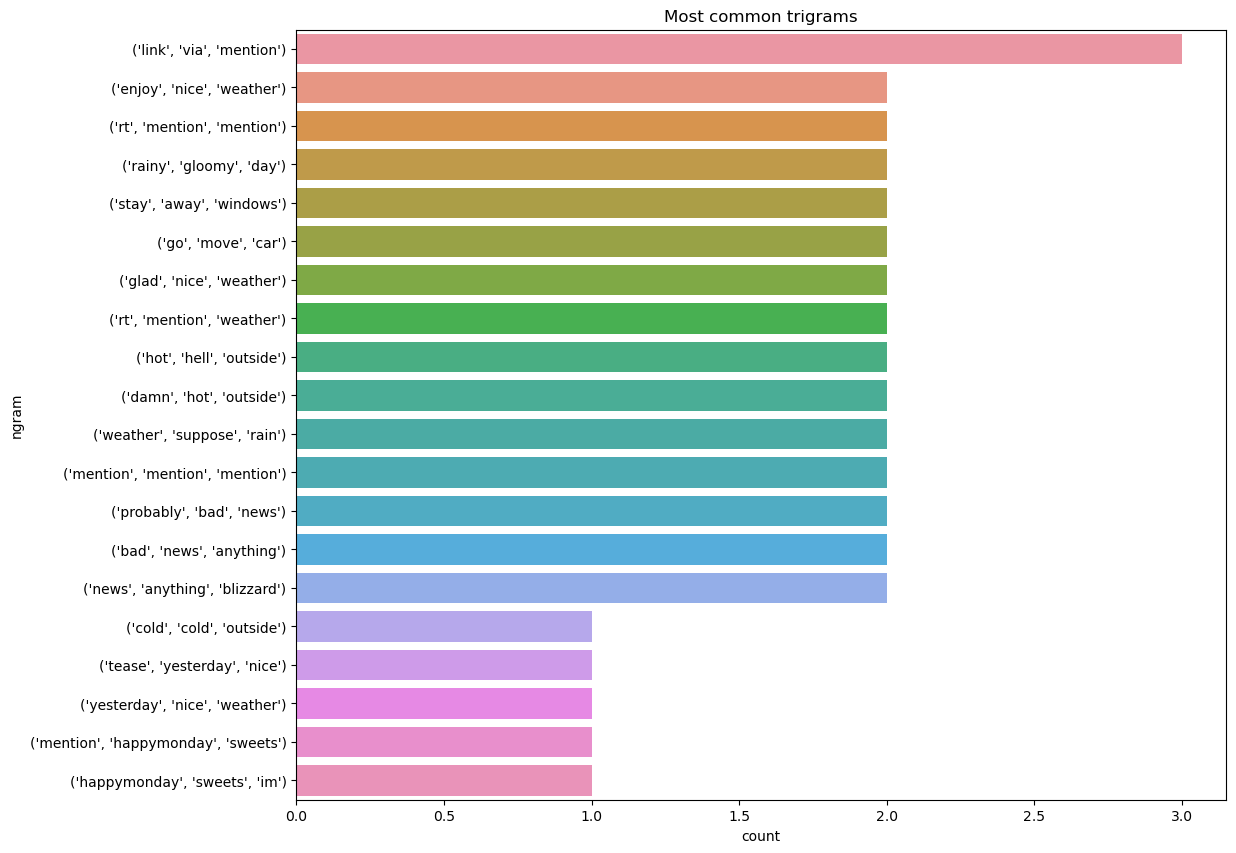

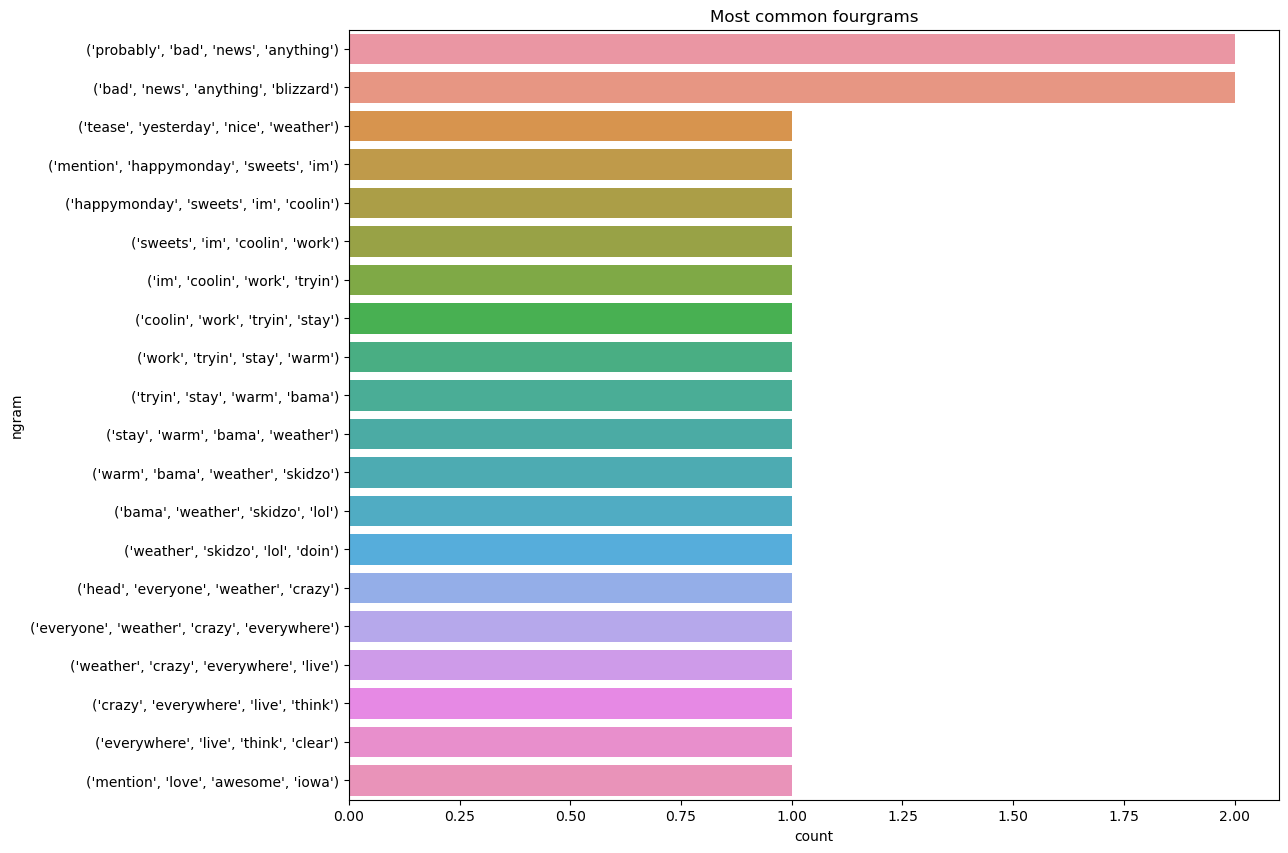

In [35]:
def preprocess_text(text):
    """Preprocess text into normalised tokens."""
    # Tokenise words into alphabetic tokens
    tokeniser = RegexpTokenizer(r'[A-Za-z]{2,}')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stop_words]
    return keywords
def get_frequent_ngram(corpus, ngram, n=20):
    """Find most common n n-grams tokens."""
    # Preprocess each document
    documents = [preprocess_text(document) for document in corpus]
    
    # Find ngrams per document
    n_grams = [list(ngrams(document, ngram)) for document in documents]
    
    # Find frequency of ngrams
    n_grams_flattened = [item for sublist in n_grams for item in sublist]
    freq_dist = FreqDist(n_grams_flattened)
    top_freq = freq_dist.most_common(n)
    return pd.DataFrame(top_freq, columns=["ngram", "count"])
# Get frequent ngrams for all 4
for i in range(1,5):
    mapping = {1:"uni", 2:"bi", 3:"tri", 4:"four"}
    plt.figure(figsize=(12,10))
    sns.barplot(x="count", y="ngram", data=get_frequent_ngram(train['tweet_text'], i))
    plt.title(f"Most common {mapping[i]}grams");


In [36]:
# tokeniser = RegexpTokenizer("[A-Za-z]+")
train["n_sentences"] = train["tweet_text"].apply(sent_tokenize).apply(len)
train["tokens"] = train["tweet_text"].apply(tokeniser.tokenize)
train["n_tokens"] = train["tokens"].apply(len)
train["n_characters"] = train["tweet_text"].apply(len)
train["n_stopwords"] = train["tokens"].apply(lambda tokens: len([t for t in tokens if t in stop_words]))
train["p_stopwords"] = train["n_stopwords"]/train["n_tokens"]
# Inspect head
columns = ['emotion', 'n_sentences', 'n_tokens', 'n_characters', 'n_stopwords', 'p_stopwords']
train[columns].head()

,emotion,n_sentences,n_tokens,n_characters,n_stopwords,p_stopwords
432,Negative,1,5,25,2,0.400000
390,Positive,2,8,44,3,0.375000
928,Negative,4,24,132,8,0.333333
156,Negative,2,23,117,10,0.434783
295,Positive,2,15,95,5,0.333333


In [37]:
train.describe()

,n_sentences,n_tokens,n_characters,n_stopwords,p_stopwords
count,401.000000,401.000000,401.000000,401.000000,401.000000
mean,1.877805,14.374065,79.344140,5.082294,0.333716
std,0.998765,6.521099,34.922146,3.189939,0.137444
min,1.000000,1.000000,8.000000,0.000000,0.000000
25%,1.000000,9.000000,51.000000,3.000000,0.250000
50%,2.000000,14.000000,77.000000,5.000000,0.333333
75%,2.000000,20.000000,110.000000,7.000000,0.421053
max,8.000000,29.000000,140.000000,14.000000,0.750000


In [38]:
num_vars = train.select_dtypes(np.number).columns
train.groupby("emotion")[num_vars].agg(["mean", "median"])

n_sentences          n_tokens        n_characters        n_stopwords  \
                mean median       mean median         mean median        mean   
emotion                                                                         
Negative    1.740741    1.0  14.125000   13.0    76.092593   72.5    5.226852   
Positive    2.037838    2.0  14.664865   14.0    83.140541   82.0    4.913514   

                p_stopwords            
         median        mean    median  
emotion                                
Negative    5.0    0.348673  0.363636  
Positive    5.0    0.316252  0.333333

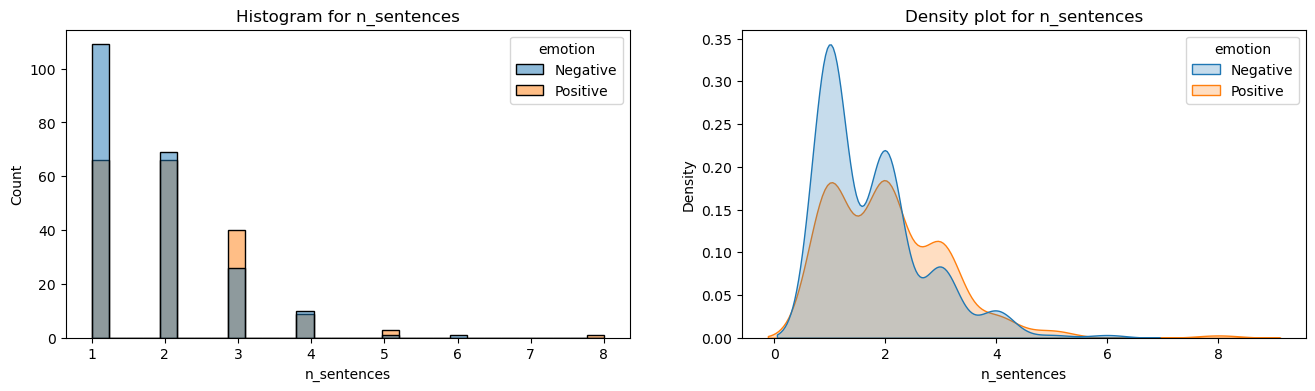

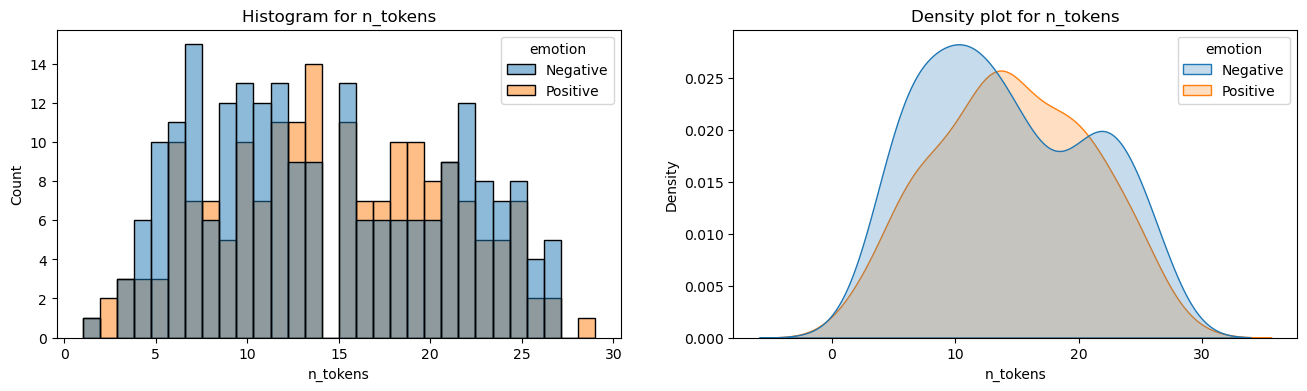

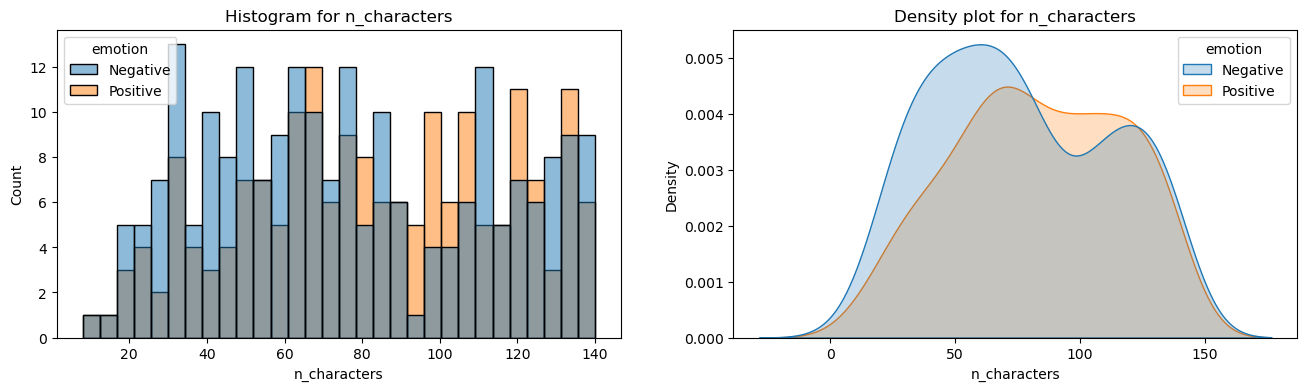

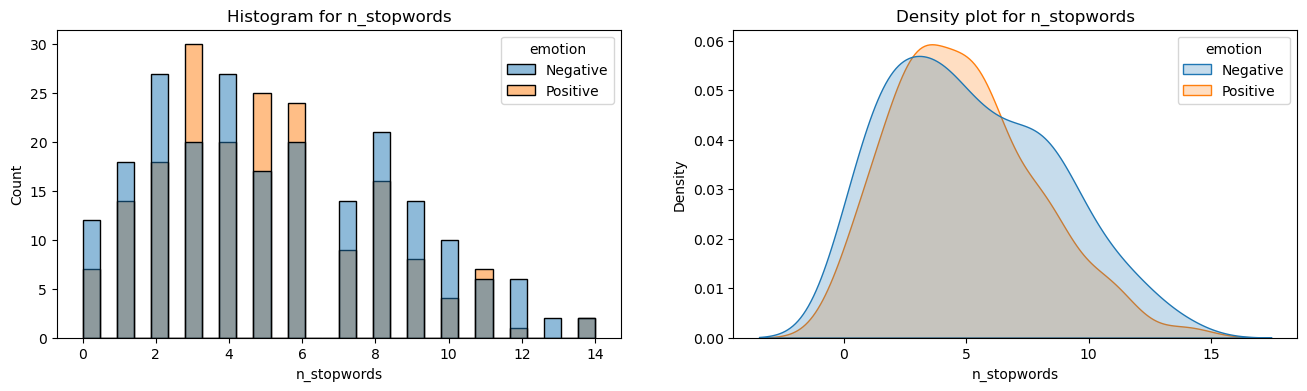

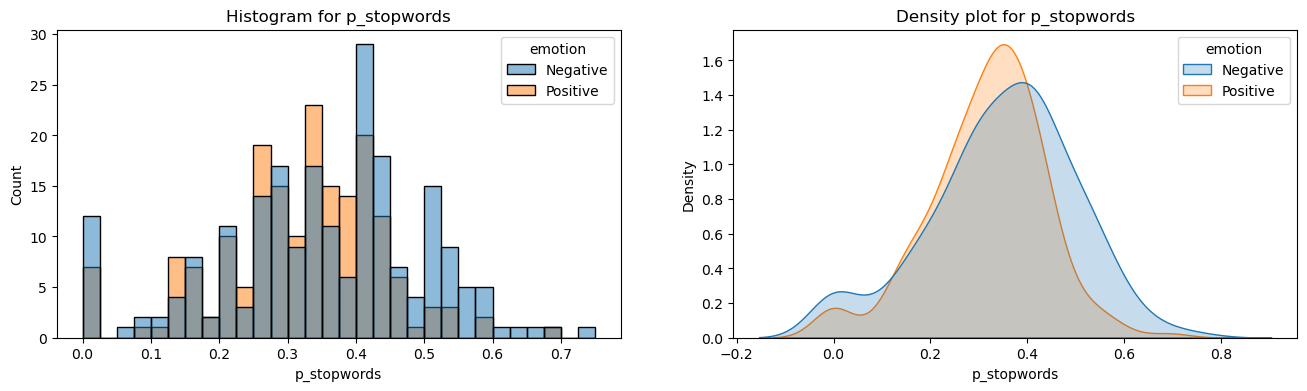

In [39]:
def plot_distribution(df, var, hue):
    """Plot overlayed histogram and density plot per sentiment."""
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,4])
    
    # Histogram
    sns.histplot(data=df, x=var, hue=hue, bins=30, kde=False, ax=ax[0])
    ax[0].set_title(f"Histogram for {var}")
    
    # Density plot
    sns.kdeplot(data=df, x=var, hue=hue, shade=True, ax=ax[1])
    ax[1].set_title(f"Density plot for {var}");
    
# Plot for all numerical variables
for var in num_vars:
    plot_distribution(train, var, 'emotion')